# Extracting a Polygon
#### This notebook will demonstrate how to extract a polygon of data defined by a set of points (corners) and then view the data graphically.

## Setup

In [1]:
import os
import warnings

import cartopy.crs as ccrs
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cap_sample_data
from clean_air.data import DataSubset

warnings.filterwarnings("ignore", message=".*\*approx\* keyword argument")

ERROR 1: PROJ: proj_create_from_database: Open of /home/h04/twilson/.conda/envs/cap_env/share/proj failed


In [2]:
SAMPLEDIR = cap_sample_data.path

## Extracting a polygon
#### You can now define a set of points, or corners, represented by coordinate values in metres.  These points can then be used to create a polygon using shapely's geometry library, and to then extract the data within this polygon with clean_air's DataSubset functions.

In [3]:
points = [
    (289271.9, 93197.0),
    (289351.3, 95110.1),
    (293405.1, 96855.0),
    (296721.1, 94960.3),
    (297165.1, 86966.9),
    (294181.6, 89357.2),
    (291388.0, 89272.6),
]
shape = sgeom.Polygon(points)
ds = DataSubset(os.path.join(SAMPLEDIR, "model_full", "aqum_hourly_o3_20200520.nc"))
cube = ds.extract_shape(shape)

## Viewing the data
#### You can view the properties and attributes of the data subset by calling the variable it is defined by, as shown below.

In [4]:
cube

<iris 'Cube' of mass_concentration_of_ozone_in_air / (ug/m3) (time: 24; projection_y_coordinate: 704; projection_x_coordinate: 548)>

#### Plotting a polygon is slightly more involved than plotting, for example, a single point or a box.

#### Here we have specified a coordinate reference system from cartopy and a plotting mode from iris quickplot.  We have then defined an axis using matplotlib.pyplot and added coastlines and our polygon as a geometry.

#### For more information about your plotting options, please take a look at these reference guides:
https://scitools.org.uk/cartopy/docs/latest/reference/crs.html

https://scitools-iris.readthedocs.io/en/stable/generated/api/iris/quickplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca

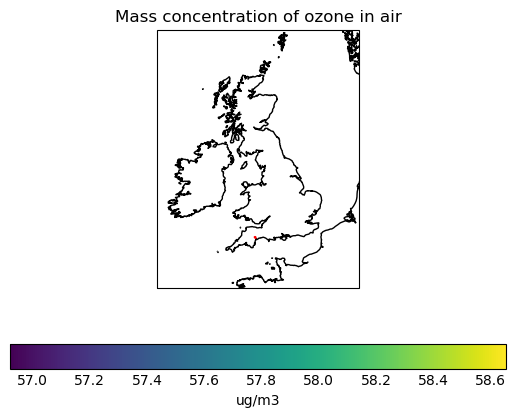

In [5]:
crs = ccrs.OSGB()
qplt.pcolormesh(cube.collapsed("time", iris.analysis.MEAN))
ax = plt.gca()
ax.coastlines()
ax.add_geometries([shape], crs=crs, facecolor="none", edgecolor="red")
plt.show()